In [ ]:
cd /content/drive/MyDrive/Google Colab/Md. Mahmudul Hasan Shahin Shahin | Infolytx AI ML Trainee Program/Regression/

/content/drive/MyDrive/Google Colab/Infolytx/Regression


# &#128209; House Price Problem:
In this House Price Prediction problem we need to predict the Price of Houses.

* LINK : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# 🔗Import All Library

In [ ]:
import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn import ensemble

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.metrics import accuracy_score, log_loss, average_precision_score, f1_score, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression ,Ridge, Lasso, ElasticNet, Lars, OrthogonalMatchingPursuit, BayesianRidge
from sklearn.linear_model import PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor, HuberRegressor, ARDRegression, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression

from statistics import mode

# 💉Data set Import

In [ ]:
data_frame_train = pd.read_csv('Data/train.csv')
data_frame_test = pd.read_csv('Data/test.csv')

In [ ]:
data_frame_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data_frame_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print('Total row col of train data : ',data_frame_train.shape[0],' ',data_frame_train.shape[1])
print('Total row col of test data  : ',data_frame_test.shape[0],' ',data_frame_test.shape[1])

Total row col of train data :  1460   81
Total row col of test data  :  1459   80


# 📑 EDA Analysis.

## 1. Null/Missing Value Checking.

In [ ]:
null = data_frame_train.isnull().sum()
column_train = data_frame_train.columns

null_train = pd.DataFrame(columns=["Train", "Null"])
for col in column_train:
  if null[col] > 0:
    #print(null[col])
    temp = pd.DataFrame([[col, null[col]]], columns=["Train", "Null"])
    null_train = null_train.append(temp, ignore_index=True)
null_train

,Train,Null
0,LotFrontage,259
1,Alley,1369
2,MasVnrType,8
3,MasVnrArea,8
4,BsmtQual,37
5,BsmtCond,37
6,BsmtExposure,38
7,BsmtFinType1,37
8,BsmtFinType2,38
9,Electrical,1


In [ ]:
null = data_frame_test.isnull().sum()
column_test = data_frame_test.columns

null_test = pd.DataFrame(columns=["Test", "Null"])
for col in column_test:
  if null[col] > 0:
    #print(null[col])
    temp = pd.DataFrame([[col, null[col]]], columns=["Test", "Null"])
    null_test = null_test.append(temp, ignore_index=True)
null_test

,Test,Null
0,MSZoning,4
1,LotFrontage,227
2,Alley,1352
3,Utilities,2
4,Exterior1st,1
5,Exterior2nd,1
6,MasVnrType,16
7,MasVnrArea,15
8,BsmtQual,44
9,BsmtCond,45


## 2. Frequency Checking

In [ ]:
uniq_train = pd.DataFrame(columns=["Train", "Unique", "N-Unique"])

for col in column_train:
  a = data_frame_train[col].unique()
  b = data_frame_train[col].nunique()
  temp = pd.DataFrame([[col, a, b]], columns=["Train", "Unique", "N-Unique"])
  uniq_train = uniq_train.append(temp, ignore_index=True)
uniq_train

,Train,Unique,N-Unique
0,Id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1460
1,MSSubClass,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",15
2,MSZoning,"[RL, RM, C (all), FV, RH]",5
3,LotFrontage,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",110
4,LotArea,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,...",1073
...,...,...,...
76,MoSold,"[2, 5, 9, 12, 10, 8, 11, 4, 1, 7, 3, 6]",12
77,YrSold,"[2008, 2007, 2006, 2009, 2010]",5
78,SaleType,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...",9
79,SaleCondition,"[Normal, Abnorml, Partial, AdjLand, Alloca, Fa...",6


In [ ]:
uniq_test = pd.DataFrame(columns=["Test", "Unique", "N-Unique"])

for col in column_test:
  a = data_frame_test[col].unique()
  b = data_frame_test[col].nunique()
  temp = pd.DataFrame([[col, a, b]], columns=["Test", "Unique", "N-Unique"])
  uniq_test = uniq_test.append(temp, ignore_index=True)
uniq_test

,Test,Unique,N-Unique
0,Id,"[1461, 1462, 1463, 1464, 1465, 1466, 1467, 146...",1459
1,MSSubClass,"[20, 60, 120, 160, 80, 30, 50, 90, 85, 190, 45...",16
2,MSZoning,"[RH, RL, RM, FV, C (all), nan]",5
3,LotFrontage,"[80.0, 81.0, 74.0, 78.0, 43.0, 75.0, nan, 63.0...",115
4,LotArea,"[11622, 14267, 13830, 9978, 5005, 10000, 7980,...",1106
...,...,...,...
75,MiscVal,"[0, 12500, 500, 1500, 300, 450, 80, 600, 490, ...",26
76,MoSold,"[6, 3, 1, 4, 5, 2, 7, 10, 8, 11, 9, 12]",12
77,YrSold,"[2010, 2009, 2008, 2007, 2006]",5
78,SaleType,"[WD, COD, New, ConLD, Oth, Con, ConLw, ConLI, ...",9


## 3. Data type Checking

In [ ]:
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data_frame_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 4. Null/Missing value Visualization

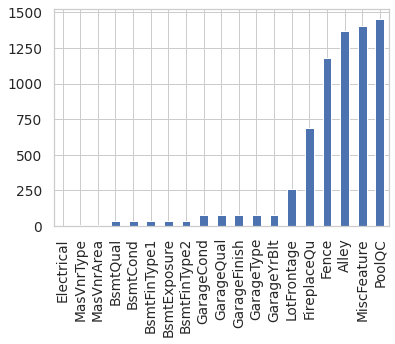

In [ ]:
sns.set_style("whitegrid")
missing = data_frame_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

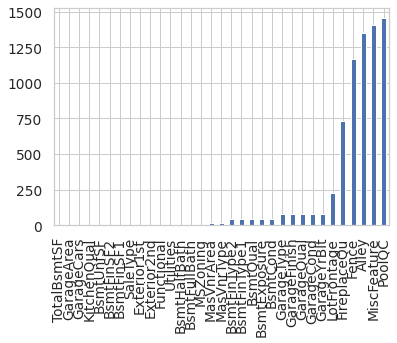

In [ ]:
sns.set_style("whitegrid")
missing = data_frame_test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

# 📝 Feature Engineering.

## 🔪 Outlier Treatment.

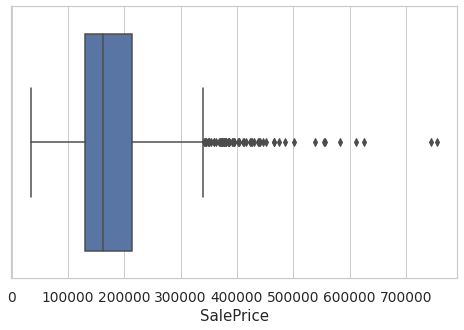

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x=data_frame_train['SalePrice'])

In [ ]:
data_frame_train = data_frame_train[data_frame_train.SalePrice < 330000]
data_frame_train.reset_index(drop=True, inplace=True)
data_frame_train.shape

(1389, 81)

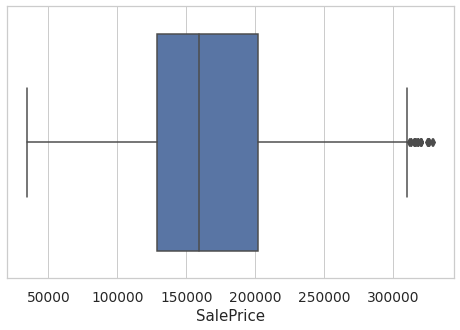

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x=data_frame_train['SalePrice'])

## 🔪 Drop Most Null value features


In [ ]:
drop_feature = ['Id','PoolQC','Fence','MiscFeature','Alley']
my_scan_train = data_frame_train.drop(drop_feature, axis=1)
my_scan_test = data_frame_test.drop(drop_feature, axis=1)

In [ ]:
year_all = ['YearBuilt', 'YearRemodAdd','YrSold','MoSold','GarageYrBlt']
for i in year_all:
    my_scan_train[i] = my_scan_train[i].astype(object)
    my_scan_test[i] = my_scan_test[i].astype(object)

## 💕 Feature transformation

In [ ]:
qual_listt = ['HeatingQC','OverallQual','ExterQual','BsmtQual','KitchenQual','FireplaceQu','GarageQual']
cond_listt = ['OverallCond','ExterCond','BsmtCond','GarageCond']
area_sf_list = ['LotFrontage','MasVnrArea','GarageArea','TotalBsmtSF','BsmtFullBath','GarageCars','BsmtHalfBath','BsmtFinSF1','BsmtUnfSF','BsmtFinSF2']

my_scan_train['BsmtQual'] = my_scan_train['BsmtQual'].fillna('NA')
my_scan_test['BsmtQual'] = my_scan_test['BsmtQual'].fillna('NA')

In [ ]:
dic = {'NA':.5,'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 3.5, 'Ex': 5}

for i in (qual_listt+cond_listt):
  my_scan_train[i] = my_scan_train[i].fillna(my_scan_train[i].mode()[0])
  if my_scan_train[i].dtype == object:
    my_scan_train[i] = my_scan_train[i].map(dic)

  my_scan_test[i] = my_scan_test[i].fillna(my_scan_test[i].mode()[0])
  if my_scan_test[i].dtype == object:
    my_scan_test[i] = my_scan_test[i].map(dic)

## 💕  Null/Missing Value Treatment

In [ ]:
for col in area_sf_list:
  if col in ['BsmtHalfBath','BsmtFullBath','GarageCars']:
    my_scan_train[col] = my_scan_train[col].fillna(my_scan_train[col].mode()[0])
    my_scan_test[col] = my_scan_test[col].fillna(my_scan_test[col].mode()[0])
  else:
    my_scan_train[col] = my_scan_train[col].fillna(my_scan_train[col].mean())
    my_scan_test[col] = my_scan_test[col].fillna(my_scan_test[col].mean())

In [ ]:
for j in my_scan_train:
    if my_scan_train[j].dtype == object:
        my_scan_train[j] = my_scan_train[j].fillna(my_scan_train[j].mode()[0])
    else:
        my_scan_train[j] = my_scan_train[j].astype('float64')

for j in my_scan_test:
    if my_scan_test[j].dtype == object:
        my_scan_test[j] = my_scan_test[j].fillna(my_scan_test[j].mode()[0])
    else:
        my_scan_test[j] = my_scan_test[j].astype('float64')

In [ ]:
my_scan_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.000000,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3.5,3.0,PConc,3.5,3.0,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,5.0,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,3.5,8.0,Typ,0.0,3.5,Attchd,2003.0,RFn,2.0,548.0,3.0,3.0,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2,2008,WD,Normal,208500.0
1,20.0,RL,80.000000,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3.0,3.0,CBlock,3.5,3.0,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5.0,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3.0,6.0,Typ,1.0,3.0,Attchd,1976.0,RFn,2.0,460.0,3.0,3.0,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2007,WD,Normal,181500.0
2,60.0,RL,68.000000,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3.5,3.0,PConc,3.5,3.0,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,5.0,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,3.5,6.0,Typ,1.0,3.0,Attchd,2001.0,RFn,2.0,608.0,3.0,3.0,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9,2008,WD,Normal,223500.0
3,70.0,RL,60.000000,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3.0,3.0,BrkTil,3.0,3.5,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,3.5,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,3.5,7.0,Typ,1.0,3.5,Detchd,1998.0,Unf,3.0,642.0,3.0,3.0,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2,2006,WD,Abnorml,140000.0
4,60.0,RL,84.000000,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3.5,3.0,PConc,3.5,3.0,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,5.0,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,3.5,9.0,Typ,1.0,3.0,Attchd,2000.0,RFn,3.0,836.0,3.0,3.0,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12,2008,WD,Normal,250000.0
5,50.0,RL,85.000000,14115.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5.0,5.0,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,3.0,Wood,3.5,3.0,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,5.0,Y,SBrkr,796.0,566.0,0.0,1362.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,5.0,Typ,0.0,3.5,Attchd,1993.0,Unf,2.0,480.0,3.0,3.0,Y,40.0,30.0,0.0,320.0,0.0,0.0,700.0,10,2009,WD,Normal,143000.0
6,20.0,RL,75.000000,10084.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8.0,5.0,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,3.5,3.0,PConc,5.0,3.0,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,5.0,Y,SBrkr,1694.0,0.0,0.0,1694.0,1.0,0.0,2.0,0.0,3.0,1.0,3.5,7.0,Typ,1.0,3.5,Attchd,2004.0,RFn,2.0,636.0,3.0,3.0,Y,255.0,57.0,0.0,0.0,0.0,0.0,0.0,8,2007,WD,Normal,307000.0
7,60.0,RL,68.893298,10382.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7.0,6.0,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,3.0,3.0,CBlock,3.5,3.0,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,5.0,Y,SBrkr,1107.0,983.0,0.0,2090.0,1.0,0.0,2.0,1.0,3.0,1.0,3.0,7.0,Typ,2.0,3.0,Attchd,1973.0,RFn,2.0,484.0,3.0,3.0,Y,235.0,204.0,228.0,0.0,0.0,0.0,350.0,11,2009,WD,Normal,200000.0
8,50.0,RM,51.000000,6120.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7.0,5.0,1931,1950,Gab

In [ ]:
my_scan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1389 non-null   float64
 1   MSZoning       1389 non-null   object 
 2   LotFrontage    1389 non-null   float64
 3   LotArea        1389 non-null   float64
 4   Street         1389 non-null   object 
 5   LotShape       1389 non-null   object 
 6   LandContour    1389 non-null   object 
 7   Utilities      1389 non-null   object 
 8   LotConfig      1389 non-null   object 
 9   LandSlope      1389 non-null   object 
 10  Neighborhood   1389 non-null   object 
 11  Condition1     1389 non-null   object 
 12  Condition2     1389 non-null   object 
 13  BldgType       1389 non-null   object 
 14  HouseStyle     1389 non-null   object 
 15  OverallQual    1389 non-null   float64
 16  OverallCond    1389 non-null   float64
 17  YearBuilt      1389 non-null   int64  
 18  YearRemo

Feature transformation by maping values

In [ ]:
house_style = {'1.5Unf':1,'SFoyer':2, '1.5Fin': 3, '2.5Unf': 4, 'SLvl': 5, '1Story': 6, '2Story': 7, '2.5Fin': 8}
utilities = {'NoSeWa':1,'AllPub':2}
roof_matl = {'Roll':1,'ClyTile':2, 'CompShg': 3, 'Metal': 4, 'Tar&Grv': 5, 'WdShake': 6, 'Membran': 7, 'WdShngl': 8}
heating = {'Floor':1,'Grav':2, 'Wall': 3, 'OthW': 4, 'GasW': 5, 'GasA': 6}
electrical = {'Mix':1,'FuseP':2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}

my_scan_train['Utilities'] = my_scan_train['Utilities'].map(utilities)
my_scan_train['HouseStyle'] = my_scan_train['HouseStyle'].map(house_style)
my_scan_train['RoofMatl'] = my_scan_train['RoofMatl'].map(roof_matl)
my_scan_train['Heating'] = my_scan_train['Heating'].map(heating)
my_scan_train['Electrical'] = my_scan_train['Electrical'].map(electrical)

my_scan_test['Utilities'] = my_scan_test['Utilities'].map(utilities)
my_scan_test['HouseStyle'] = my_scan_test['HouseStyle'].map(house_style)
my_scan_test['RoofMatl'] = my_scan_test['RoofMatl'].map(roof_matl)
my_scan_test['Heating'] = my_scan_test['Heating'].map(heating)
my_scan_test['Electrical'] = my_scan_test['Electrical'].map(electrical)

## 💕 Create New Features

In [ ]:
my_scan_train['RemodAdd'] = my_scan_train['YearBuilt']

for i in range(len(my_scan_train)):
    if my_scan_train['YearBuilt'].iloc[i] == my_scan_train['YearRemodAdd'].iloc[i]:
        my_scan_train['RemodAdd'].iloc[i] = 0
    else:
        my_scan_train['RemodAdd'].iloc[i] = abs(my_scan_train['YearBuilt'].iloc[i]- my_scan_train['YearRemodAdd'].iloc[i])

my_scan_test['RemodAdd'] = my_scan_test['YearBuilt']

for i in range(len(my_scan_test)):
    if my_scan_test['YearBuilt'].iloc[i] == my_scan_test['YearRemodAdd'].iloc[i]:
        my_scan_test['RemodAdd'].iloc[i] = 0
    else:
        my_scan_test['RemodAdd'].iloc[i] = abs(my_scan_test['YearBuilt'].iloc[i]- my_scan_test['YearRemodAdd'].iloc[i])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
my_scan_train['DiffEx'] = my_scan_train['ExterCond']

for i in range(len(my_scan_train)):
    if my_scan_train['ExterQual'].iloc[i] == my_scan_train['ExterCond'].iloc[i]:
        my_scan_train['DiffEx'].iloc[i] = 0
    else:
        my_scan_train['DiffEx'].iloc[i] = abs(my_scan_train['ExterQual'].iloc[i]- my_scan_train['ExterCond'].iloc[i])

my_scan_test['DiffEx'] = my_scan_test['ExterCond']

for i in range(len(my_scan_test)):
    if my_scan_test['ExterQual'].iloc[i] == my_scan_test['ExterCond'].iloc[i]:
        my_scan_test['DiffEx'].iloc[i] = 0
    else:
        my_scan_test['DiffEx'].iloc[i] = abs(my_scan_test['ExterQual'].iloc[i]- my_scan_test['ExterCond'].iloc[i])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## 💕 Concatenate Features

In [ ]:
my_scan_train['CompletedBstmSf'] = my_scan_train['TotalBsmtSF'] - my_scan_train['BsmtUnfSF']
my_scan_train['CompletedFloorSF'] = my_scan_train['1stFlrSF'] + my_scan_train['2ndFlrSF']
my_scan_train['TotalBath'] = my_scan_train['BsmtFullBath'] + my_scan_train['BsmtHalfBath'] + my_scan_train['FullBath'] + my_scan_train['HalfBath']
my_scan_train['GarageAreaPerCar'] = (my_scan_train['GarageArea']+1) / (my_scan_train['GarageCars'] +1)
my_scan_train['TotalExtraArea'] = my_scan_train['WoodDeckSF'] + my_scan_train['OpenPorchSF'] + my_scan_train['EnclosedPorch'] + my_scan_train['3SsnPorch']+ my_scan_train['PoolArea']
my_scan_train['AgeOfHouse'] = abs(my_scan_train['YrSold'] - my_scan_train['YearBuilt'])

my_scan_test['CompletedBstmSf'] = my_scan_test['TotalBsmtSF'] - my_scan_test['BsmtUnfSF']
my_scan_test['CompletedFloorSF'] = my_scan_test['1stFlrSF'] + my_scan_test['2ndFlrSF']
my_scan_test['TotalBath'] = my_scan_test['BsmtFullBath'] + my_scan_test['BsmtHalfBath'] + my_scan_test['FullBath'] + my_scan_test['HalfBath']
my_scan_test['GarageAreaPerCar'] = (my_scan_test['GarageArea']+1) / (my_scan_test['GarageCars'] +1)
my_scan_test['TotalExtraArea'] = my_scan_test['WoodDeckSF'] + my_scan_test['OpenPorchSF'] + my_scan_test['EnclosedPorch'] + my_scan_test['3SsnPorch']+ my_scan_test['PoolArea']
my_scan_test['AgeOfHouse'] = abs(my_scan_test['YrSold'] - my_scan_test['YearBuilt'])

In [ ]:
#descriptive statistics summary
my_scan_train['SalePrice'].describe()

count      1389.000000
mean     169037.669546
std       57723.706975
min       34900.000000
25%      128900.000000
50%      159000.000000
75%      201800.000000
max      328900.000000
Name: SalePrice, dtype: float64

## ⚙ Checking Gaussian distrubution

### 1. Visualizing iceberg

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


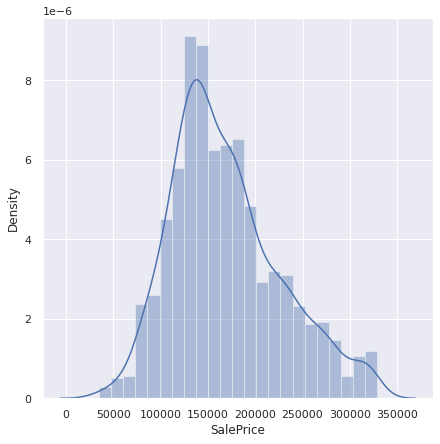

In [ ]:
plt.style.use('seaborn-paper')
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(my_scan_train['SalePrice']);

Skewness means the top of the iceberg is not in the middle but rather towards left or right.<br>
Kurtosis describe if the gaussian distrubution is very small and narrow or very wide

In [ ]:
print("Skewness: %f" % my_scan_train['SalePrice'].skew())
print("Kurtosis: %f" % my_scan_train['SalePrice'].kurt())

Skewness: 0.628518
Kurtosis: -0.000989


### 0. Applied Log Normalization

In [ ]:
my_scan_train['SalePrice'] = np.log1p(my_scan_train['SalePrice'])

### 1. Visualizing iceberg after applying log normalization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


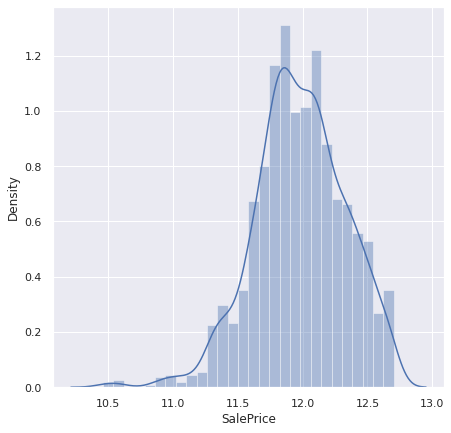

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(my_scan_train['SalePrice'])

# 🔌 Applying GradientBoostingRegressor and vizualize the MSE

The mean squared error (MSE) on test set: 0.0175


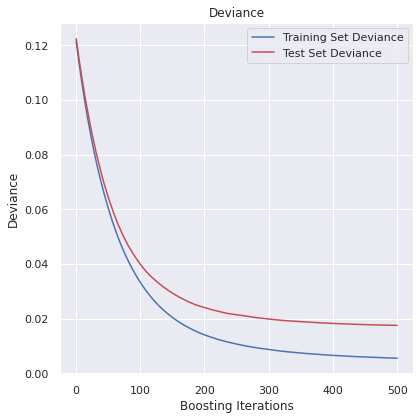

In [ ]:
temp_x = my_scan_train.drop('SalePrice', 1)
temp_x = np.log1p(temp_x.select_dtypes(exclude=object).copy())
temp_y = my_scan_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(temp_x, temp_y, test_size=0.2, random_state=13)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# 📈 Get some visual Understanding.

## 1. Heatmap of all corelated features.

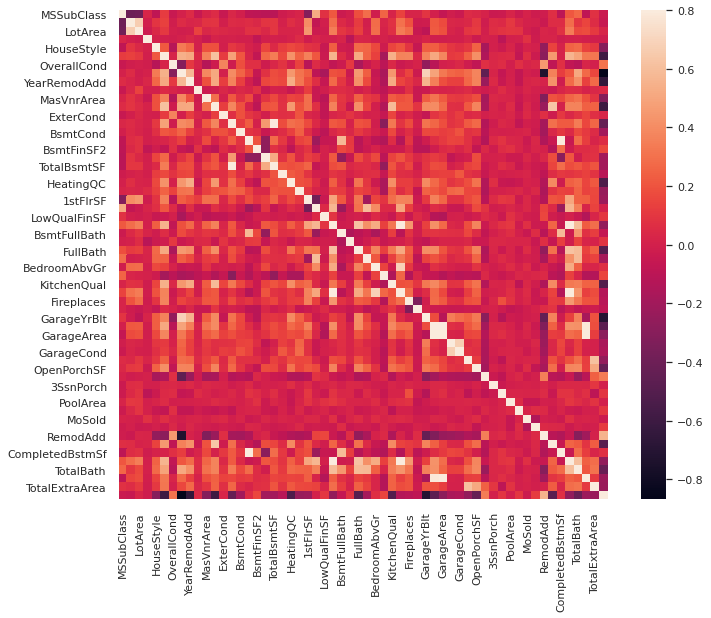

In [ ]:
corrmat = temp_x.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

## 2. Heatmap of top 10 corelated features.

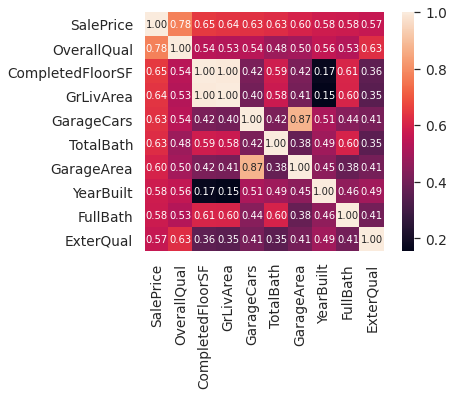

In [ ]:
k = 10 #number of variables for heatmap
corrmat = my_scan_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(my_scan_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 3. SNS ploting of top 10 corelated features.

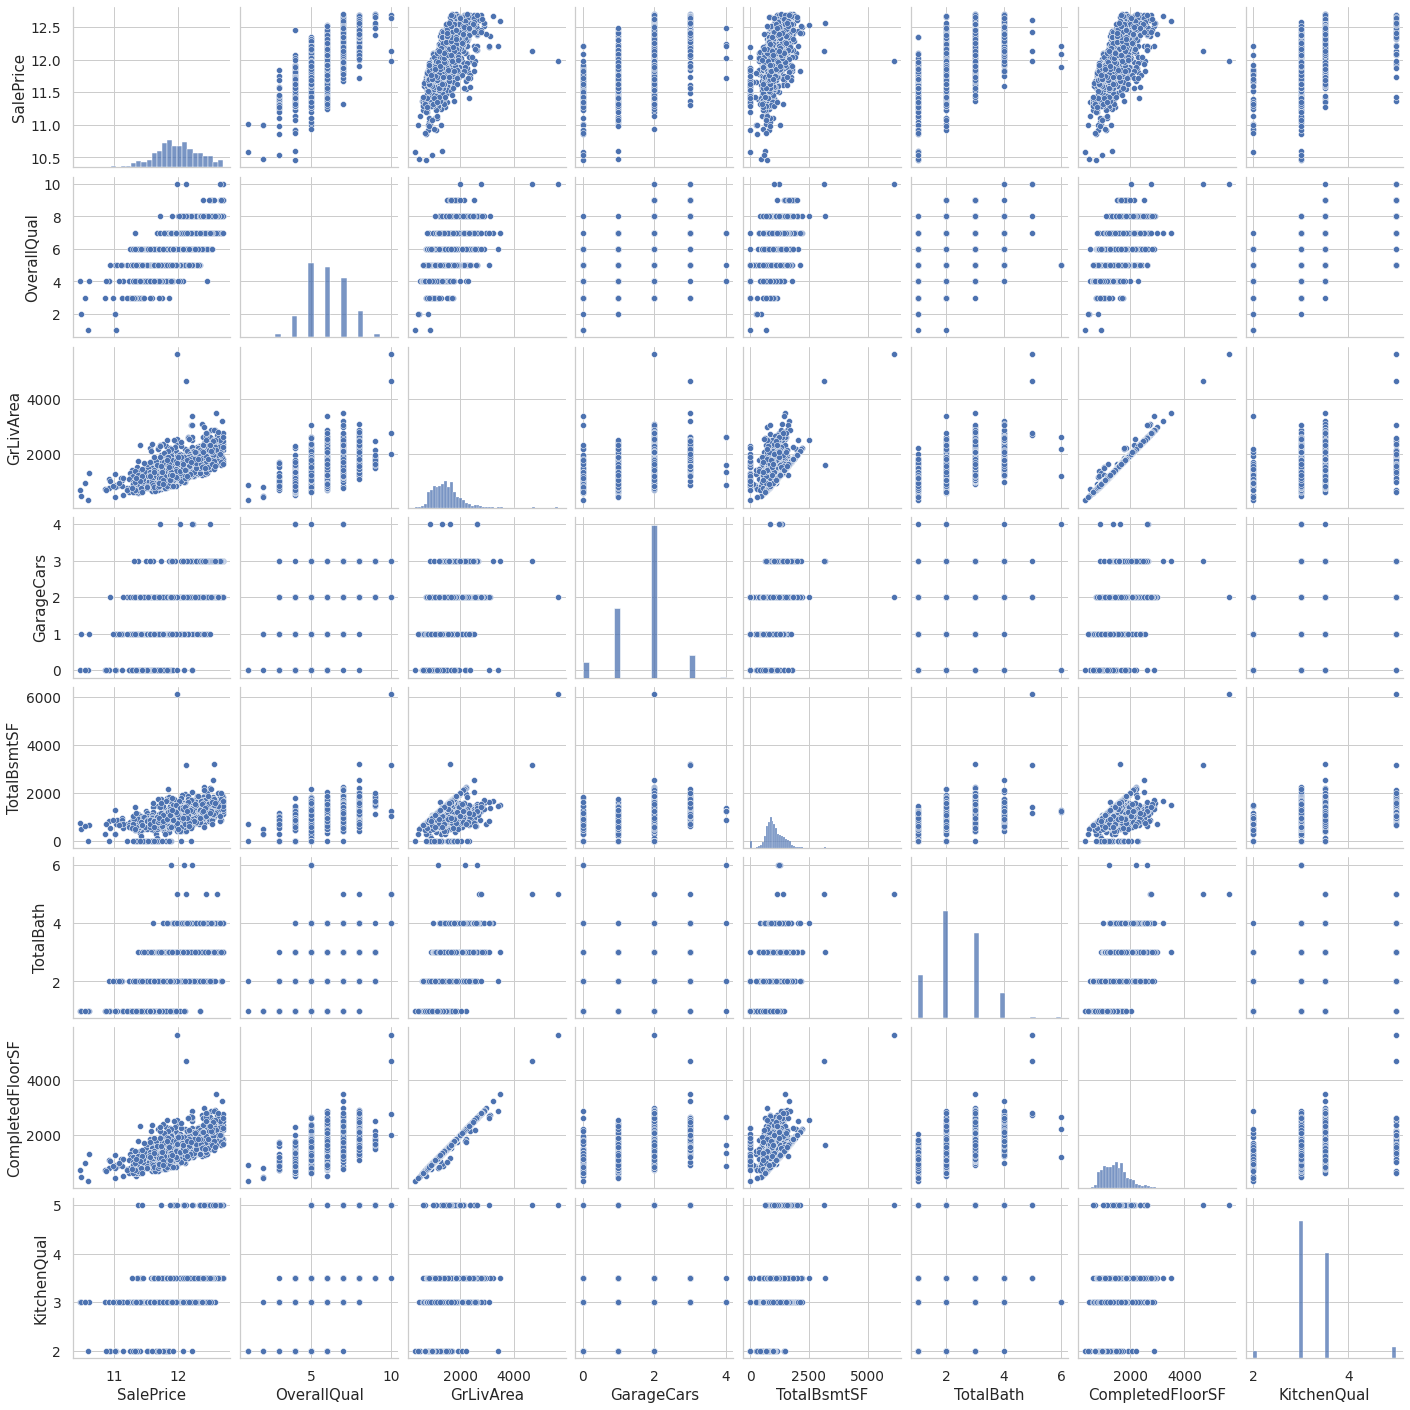

In [ ]:
sns.set_style("whitegrid");
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'TotalBath','CompletedFloorSF','KitchenQual']
sns.pairplot(my_scan_train[cols], height = 2.5)
plt.show();

# 🖨 Feature Importance findings

Text(0.5, 1.0, 'Feature Importance (MDI)')

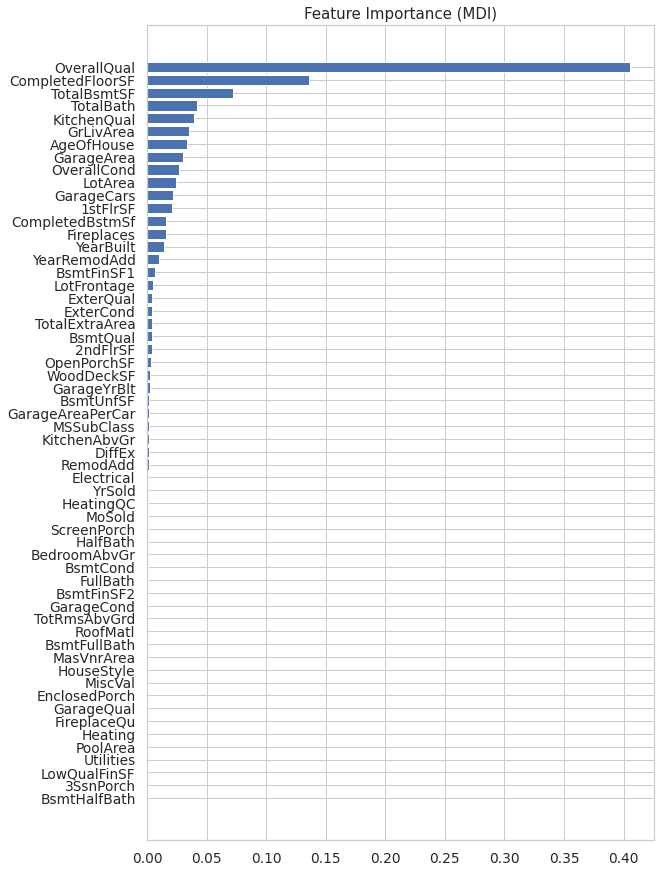

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(temp_x.columns)[sorted_idx])
aa = (pos, np.array(temp_x.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

In [ ]:
xgb_selection = ['GarageAreaPerCar','HeatingQC', 'TotalExtraArea', 'LotFrontage', 'BsmtFinSF1','Fireplaces', 'YearRemodAdd', 'AgeOfHouse', 'BsmtQual', '1stFlrSF',
       'YearBuilt', 'CompletedBstmSf', 'GarageCars', 'OverallCond','LotArea', 'GarageArea', 'GrLivArea', 'ExterQual', 'KitchenQual',
       'TotalBath', 'TotalBsmtSF', 'CompletedFloorSF', 'OverallQual']

features_skewed = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath','HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'RemodAdd','CompletedBstmSf', 'CompletedFloorSF', 'TotalBath', 'AgeOfHouse',
       'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir',
       'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType','SaleCondition']

## Make dummy column feature of categorical feature.

In [ ]:
features_skewed = pd.get_dummies(my_scan_train[features_skewed], drop_first=True)
xgb_selection = pd.get_dummies(my_scan_train[xgb_selection], drop_first=True)

In [ ]:
print(len(features_skewed.columns))
print(len(xgb_selection.columns))

173
23


# 👑 Build and Train Models.

## 📀 Applying Regressor Set A.
    LinearRegression Ridge
    PassiveAggressiveRegressor
    AdaBoostRegressor
    GradientBoostingRegressor
    XGBRegressor

In [ ]:
classifiers = [
    LinearRegression(),
    Ridge(alpha=.7),
    PassiveAggressiveRegressor(max_iter=100000, random_state=5000,tol=1e-3),
    AdaBoostRegressor(random_state=3500, n_estimators=1000,loss='square'),
    GradientBoostingRegressor(n_estimators=5000, learning_rate=0.009,
                                max_depth=25, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10,
                                loss='huber', random_state=300),
    XGBRegressor(learning_rate=0.001, n_estimators=3500,
                       max_depth=5, min_child_weight=0,
                       gamma=0.01, subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear', nthread=-1,
                       scale_pos_weight=1, seed=30,
                       reg_alpha=0.00005),
    
    SVR(C=20, epsilon=0.009, gamma=0.0004, )

]

In [ ]:
for feture_set in [xgb_selection,features_skewed]:
  print(feture_set)

      GarageAreaPerCar  HeatingQC  ...  CompletedFloorSF  OverallQual
0           183.000000        5.0  ...            1710.0          7.0
1           153.666667        5.0  ...            1262.0          6.0
2           203.000000        5.0  ...            1786.0          7.0
3           160.750000        3.5  ...            1717.0          7.0
4           209.250000        5.0  ...            2198.0          8.0
...                ...        ...  ...               ...          ...
1384        153.666667        5.0  ...            1647.0          6.0
1385        167.000000        3.0  ...            2073.0          6.0
1386        126.500000        5.0  ...            2340.0          7.0
1387        120.500000        3.5  ...            1078.0          5.0
1388        138.500000        3.5  ...            1256.0          5.0

[1389 rows x 23 columns]
      MSSubClass  LotFrontage  ...  SaleCondition_Normal  SaleCondition_Partial
0           60.0         65.0  ...                    

In [ ]:
k = 0
for feture_set in [xgb_selection,features_skewed]:

  temp_x = feture_set
  temp_x = np.log1p(temp_x.select_dtypes(exclude=object).copy())
  temp_y = my_scan_train['SalePrice']
  print("==============================================")
  if k == 0: print("             XGB Selected feature") 
  else : print("             Skewed Selected feature")
  X_train, X_test, y_train, y_test = train_test_split(temp_x, temp_y, test_size=0.2, random_state=13)
  print("==============================================")
  for clf in classifiers:
      try:
          clf.fit(X_train,y_train)
          print(clf.__class__.__name__,' ', round(clf.score(X_test, y_test) * 100, 2))
          print(mean_squared_error(y_test, clf.predict(X_test)))
          print("==============================================")
      except:
          continue
  k +=1
  print('        ___Train Finished___')

             XGB Selected feature
LinearRegression   79.72
0.025088476591456778
Ridge   79.64
0.025191601488352443
PassiveAggressiveRegressor   77.7
0.027594935332313764
AdaBoostRegressor   80.52
0.024102615866762708
GradientBoostingRegressor   86.74
0.016409613149889007
[13:02:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor   -16.53
0.14418795670734846
SVR   78.23
0.02693580594833544
        ___Train Finished___
             Skewed Selected feature
LinearRegression   80.28
0.024400770867374893
Ridge   81.59
0.02277708108967243
PassiveAggressiveRegressor   76.14
0.02952546893448573
AdaBoostRegressor   80.65
0.023945940028591562
GradientBoostingRegressor   86.96
0.016136095608218846
[13:03:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor   -18.47
0.14659084958580587
SVR   82.28
0.021924323319751145
        ___Train Finis

In [ ]:
temp_x = feture_set
temp_x = np.log1p(temp_x.select_dtypes(exclude=object).copy())
temp_y = my_scan_train['SalePrice']
y_train = np.array(temp_y)

In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(temp_x)

In [ ]:
y_train

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

## 💿 Applying Regressor Set B.
    LinearRegression
    Ridge
    Lasso
    ElasticNet
    Lars
    OrthogonalMatchingPursuit
    BayesianRidge
    PassiveAggressiveRegressor
    RANSACRegressor
    TheilSenRegressor
    HuberRegressor
    ARDRegression
    SGDRegressor
    SVR
    NuSVR
    LinearSVR
    KernelRidge
    RadiusNeighborsRegressor
    KNeighborsRegressor
    MLPRegressor
    GaussianProcessRegressor
    DecisionTreeRegressor

In [ ]:
classifiers_set_1 = [
    LinearRegression(),
    #LogisticRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    Lars(),
    OrthogonalMatchingPursuit(),
    BayesianRidge(),
    PassiveAggressiveRegressor(),
    RANSACRegressor(),
    TheilSenRegressor(),
    HuberRegressor(),
    ARDRegression(),
    SGDRegressor(),
    SVR(),
    NuSVR(),
    LinearSVR(),
    KernelRidge(),
    RadiusNeighborsRegressor(),
    KNeighborsRegressor(),
    MLPRegressor(),
    GaussianProcessRegressor(),
    DecisionTreeRegressor(),
    ]

acc_loss = pd.DataFrame(columns=["Regressor", "Accuracy"])

print('Accuracy and Loss for Train data in different Regressor : \n')

for clf in classifiers_set_1:

  name = clf.__class__.__name__
  reg = clf.fit(x_train_scaled, y_train)

  #y_pred_decision_tree = clf.predict(x_train_scaled)
  acc = reg.score(x_train_scaled, y_train)
  print('{:<25}'.format(name),": ", " Accuracy: {:.2%}".format(acc))
  #temp = pd.DataFrame([[name, acc]], columns=["Regressor", "Accuracy"])
  #acc_loss = acc_loss.append(temp)
  temp = pd.DataFrame([[name, acc*100]], columns=["Regressor", "Accuracy"])
  acc_loss = acc_loss.append(temp)

Accuracy and Loss for Train data in different Regressor : 

LinearRegression          :   Accuracy: 91.62%
Ridge                     :   Accuracy: 91.20%
Lasso                     :   Accuracy: 0.00%
ElasticNet                :   Accuracy: 0.00%
Lars                      :   Accuracy: -18499333.44%
OrthogonalMatchingPursuit :   Accuracy: 87.41%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 207 iterations, i.e. alpha=2.311e-02, with an active set of 171 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 209 iterations, i.e. alpha=1.595e-02, with an active set of 172 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)


BayesianRidge             :   Accuracy: 91.20%
PassiveAggressiveRegressor :   Accuracy: 80.24%
RANSACRegressor           :   Accuracy: -146046528828660041933389824.00%
TheilSenRegressor         :   Accuracy: 57.51%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor            :   Accuracy: 68.67%
ARDRegression             :   Accuracy: 91.11%
SGDRegressor              :   Accuracy: 38.87%
SVR                       :   Accuracy: 93.97%
NuSVR                     :   Accuracy: 96.59%
LinearSVR                 :   Accuracy: 87.89%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


KernelRidge               :   Accuracy: 66.69%
RadiusNeighborsRegressor  :   Accuracy: 99.84%
KNeighborsRegressor       :   Accuracy: 78.63%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor              :   Accuracy: 63.43%
GaussianProcessRegressor  :   Accuracy: 100.00%
DecisionTreeRegressor     :   Accuracy: 100.00%


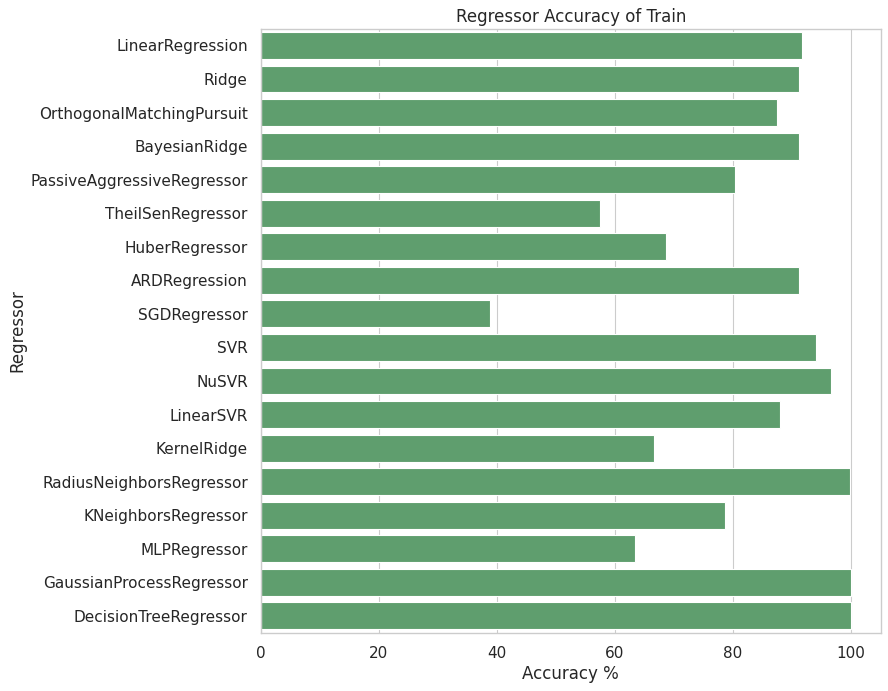

In [ ]:
plt.figure(figsize=(10,10), dpi= 80)
sns.barplot(x='Accuracy', y='Regressor', data=acc_loss[acc_loss['Accuracy'] > 0], color="g")

plt.xlabel('Accuracy %')
plt.title('Regressor Accuracy of Train')
plt.show()